### 降维
1. 在实际问题中，通常可以大大减少特征的数量，从而将棘手的问题转变为易于解决的问题

2. 数据降维确实会丢失一些信息（就好比将图像压缩为JPEG会降低其质量一样）​，所以，它虽然能够**加速训练**，但是也会**轻微降低系统性能**。同时它也让流水线更为复杂，维护难度上升。因此，如果训练太慢，你首先应该尝试的还是继续使用原始数据，然后再考虑数据降维

3. 不过在某些情况下，降低训练数据的维度可能会滤除掉一些不必要的噪声和细节，从而导致性能更好（但通常来说不会）

4. 除了加快训练，降维对于**数据可视化**(或称DataViz)也非常有用。将维度降到两个（或三个）​，就可以在图形上绘制出高维训练集，通过视觉来检测模式，常常可以获得一些十分重要的洞察，比如聚类

5. 学习现在最流行的三种数据降维技术：PCA、Kernal PCA以及LLE。

#### 高纬度是反直觉的
1. 高维空间中的样本点是大概率呈现稀疏分布的。大多数训练样本之间可能彼此相距非常远。训练集维度越高，过拟合风险越大。

#### 降维的主要方法

##### 投影

##### 流形学习
1. 许多降维算法通过对训练实例所在的流形进行建模来工作。这称为流形学习。它依赖于流形假设（也称为流形假说）​，该假设认为大多数现实世界的高维数据集都接近于低维流形。通常这是根据经验观察到的这种假设。

    - 假设你正在参加一个舞会，舞会上的人们(训练实例)都在跳舞，他们的舞步(数据点)在舞池(高维数据集)中移动。突然，你注意到所有的舞者都在按照一种特定的模式(流形)移动，比如他们都沿着某种曲线或者按照某种规律旋转。这就是流形学习的原理，它假设大多数现实世界的高维数据集都接近于低维流形，就像舞会上的舞者们都按照某种模式移动一样。这种假设是基于经验观察的，就像你在舞会上观察到所有的舞者都在按照某种模式移动一样。然后，降维算法就会根据这种模式，将高纬的舞池(数据集)降维到低维

简而言之，在训练模型之前降低训练集的维度肯定可以加快训练速度，但这并不总是会导致更好或更简单的解决方案，它取决于数据集。

#### PCA
1. 原理： 它识别最靠近数据的超平面，然后将数据投影到其上

2. 选择**保留最大差异性的轴**看起来比较合理，因为它可能比其他两种投影丢失的信息更少。要证明这一选择，还有一种方法，即比较原始数据集与其轴上的投影之间的均方距离，使这个均方距离最小的轴是最合理的选择，也就是实线代表的轴。这也正是PCA背后的简单思想[1]
    - <img src="./images/PCA.png">
    - [PCA 原理和代码]("https://blog.csdn.net/MoreAction_/article/details/107463336")

3. 可解释方差比
    - 另一个有用的信息是每个主成分的可解释方差比，可以通过explained_variance_ratio_变量来获得：衡量特征重要性

4. 选择正确的维度
    - 与其任意选择要减小到的维度，不如选择相加足够大的方差部分（例如95%）的维度。当然，如果你是为了数据可视化而降低维度，这种情况下，需要将维度降低到2或3。


In [1]:
import numpy as np
m = 60
np.random.seed(42)
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m,3))
X[:,0] = np.cos(angles) + np.sin(angles) / 2 + noise + np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [4]:
X2D[:5]

array([[-0.04341894, -0.52999465],
       [ 1.64846022,  0.39320727],
       [ 1.1964929 , -0.30652195],
       [-0.19859085, -0.38356235],
       [-1.12018262,  0.23118899]])

In [5]:
pca.explained_variance_ratio_

array([0.87236029, 0.11990007])

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

c:\Anaconda3\envs\opencv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
from sklearn.model_selection import train_test_split

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [8]:
print(d)

154


还有一个更好的选择：将n_components设置为0.0到1.0之间的浮点数来表示要保留的方差率，而不是指定要保留的主成分数：

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

1. 另一个选择是将可解释方差绘制成维度的函数（简单地用cumsum绘制，见图8-8）​。曲线上通常会出现一个拐点，其中可解释方差会停止快速增大。在这种情况下，你可以看到将维度降低到大约100而不会损失太多的可解释方差
2. 将PCA应用于MNIST数据集，同时保留其95%的方差。你会发现每个实例将具有150多个特征，而不是原始的784个特征

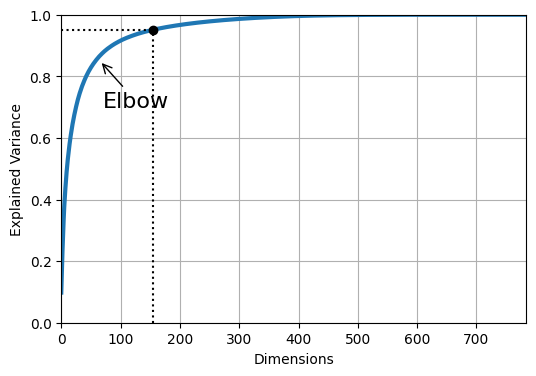

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

1. 通过应用PCA投影的逆变换，还可以将缩减后的数据集**解压缩回784维**。由于投影会丢失一些信息（在5%的方差被丢弃）​，因此这不会给你原始的数据，但可能会接近原始数据。原始数据与重构数据（压缩后再解压缩）之间的均方距离称为**重构误差**。
2. 使用inverse_transform（​）方法将其解压缩回784个维度：

In [7]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

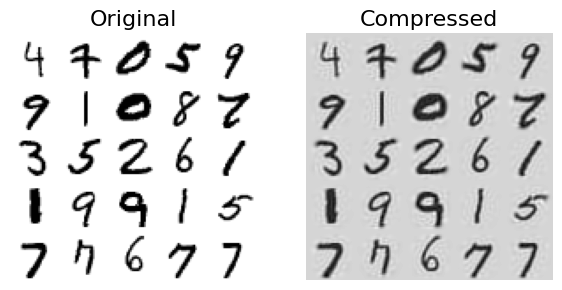

In [9]:
from math import ceil
import matplotlib as mpl
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    
    n_rows = ceil(len(instances) / images_per_row)
    
    # Append empty images to fill the end of the grid, if needed
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size*size))], axis=0)
    
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    
    big_image = image_grid.transpose(0,2,1,3).reshape(n_rows * size, images_per_row * size)
    
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('Compressed', fontsize=16)

plt.show()
    

#### 随机PCA
1. 如果将超参数svd_solver设置为"randomized"，则Scikit-Learn将使用一种称为Randomized PCA的随机算法，该算法可以快速找到前d个主成分的近似值。它的计算复杂度为O（m×d2）+O（d3）​，而不是完全SVD方法的O（m×n2）+O（n3）​，因此，当d远远小于n时，它比完全的SVD快得多：
2. 默认情况下，svd_solver实际上设置为"auto"：如果m或n大于500并且d小于m或n的80%，则Scikit-Learn自动使用随机PCA算法，否则它将使用完全的SVD方法。如果要强制Scikit-Learn使用完全的SVD，可以将svd_solver超参数设置为"full"。

In [10]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

#### 增量PCA
1. 前面的PCA实现的一个问题是，它们要求整个训练集都放入内存才能运行算法。幸运的是已经开发了增量PCA（IPCA）算法，它们可以使你把训练集划分为多个小批量，并一次将一个小批量送入IPCA算法。这对于**大型训练集**和**在线（即在新实例到来时动态运行）应用**PCA很有用。

In [11]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

2. 可以使用NumPy的memmap类，该类使你可以将存储在磁盘上的二进制文件中的大型数组当作完全是在内存中一样来操作，该类仅在需要时才将数据加载到内存中

In [ ]:
X_mm = np.memmap(filename, dtype='float32', mode='readonly',shape=(m,n))
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

#### 内核PCA
[核函数解释的参考资料](https://blog.csdn.net/m0_71212744/article/details/140488669#:~:text=%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA,%EF%BC%88SVM%EF%BC%89%E4%B8%AD%E7%9A%84%E6%A0%B8%E5%87%BD%E6%95%B0%E6%98%AF%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA%E8%83%BD%E5%A4%9F%E5%A4%84%E7%90%86%E9%9D%9E%E7%BA%BF%E6%80%A7%E9%97%AE%E9%A2%98%E5%B9%B6%E5%9C%A8%E9%AB%98%E7%BB%B4%E7%A9%BA%E9%97%B4%E4%B8%AD%E5%AD%A6%E4%B9%A0%E5%A4%8D%E6%9D%82%E5%86%B3%E7%AD%96%E8%BE%B9%E7%95%8C%E7%9A%84%E5%85%B3%E9%94%AE%E3%80%82%20%E6%A0%B8%E5%87%BD%E6%95%B0%E5%9C%A8SVM%E4%B8%AD%E6%89%AE%E6%BC%94%E7%9D%80%E5%B0%86%E8%BE%93%E5%85%A5%E7%89%B9%E5%BE%81%E6%98%A0%E5%B0%84%E5%88%B0%E6%9B%B4%E9%AB%98%E7%BB%B4%E7%A9%BA%E9%97%B4%E7%9A%84%E8%A7%92%E8%89%B2%EF%BC%8C%E4%BD%BF%E5%BE%97%E5%8E%9F%E5%A7%8B%E7%89%B9%E5%BE%81%E7%A9%BA%E9%97%B4%E4%B8%AD%E7%9A%84%E9%9D%9E%E7%BA%BF%E6%80%A7%E9%97%AE%E9%A2%98%E5%9C%A8%E9%AB%98%E7%BB%B4%E7%A9%BA%E9%97%B4%E4%B8%AD%E5%8F%98%E5%BE%97%E7%BA%BF%E6%80%A7%E5%8F%AF%E5%88%86%E3%80%82)

1. 核函数思想：它可以将实例**隐式映射到一个高维空间（称为特征空间）**​，从而可以使用支持向量机来进行非线性分类和回归
2. 事实证明，可以将相同的技术应用于PCA，从而可以执行复杂的非线性投影来降低维度

In [6]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

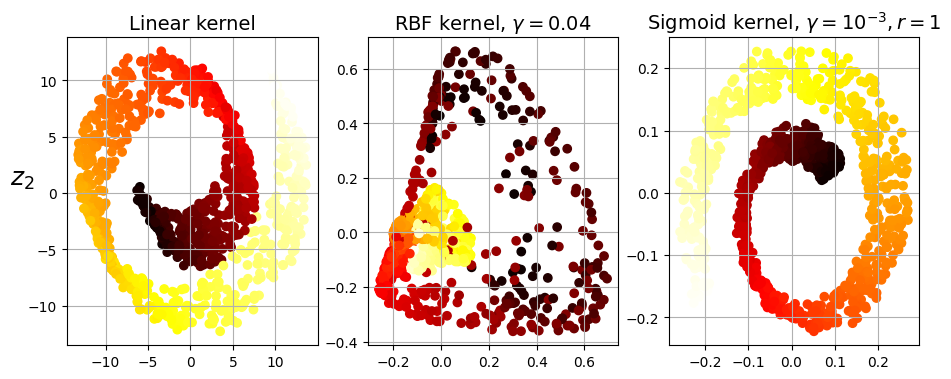

In [8]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid',gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11,4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    plt.subplot(subplot)
    plt.title(title,fontsize=14)
    # c=t 指定颜色是根据变量 t 映射的，cmap=plt.cm.hot 设置颜色映射为热图风格。
    plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

#### 选择内核并调整参数
1. 由于kPCA是一种无监督学习算法，因此没有明显的性能指标可以帮助你选择最好的内核和超参数值。也就是说，降维通常是有监督学习任务（例如分类）的准备步骤，因此你可以使用网格搜索来选择在该任务上能获得最佳性能的内核和超参数

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline(
    [
        ('kpca', KernelPCA(n_components=2)),
        ('log_reg', LogisticRegression())
    ]
)

param_grid = [
    {
        "kpca__gamma":np.linspace(0.03, 0.05, 10),
        "kpca__kernel":['rbf','sigmoid']
     }
]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [11]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


2. 另一种完全无监督的方法是选择产生最低重构误差
3. 默认情况下，fit_inverse_transform=False，并且KernelPCA没有inverse_transform（​）方法。仅当你设置fit_inverse_transform=True时，才会创建此方法。

In [12]:
# 如果设置了fit_inverse_transform=True，模型会额外存储一个从降维空间逆变换回原始空间的映射函数。这使得我们可以使用inverse_transform方法将降维后的数据近似还原到原始特征空间。
rbf_pca = KernelPCA(n_components=2, kernel='rbf',gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
# 需要fit_inverse_transform设置为True才可使用这个inverse_transform这个函数
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

32.786308795766146

#### LLE
1. 局部线性嵌入（LLE）是另一种强大的非线性降维（NLDR）技术
2. 它是一种流形学习技术，不像以前的算法那样依赖于投影。简而言之，LLE的工作原理是首先测量每个训练实例如何与其最近的邻居（c.n.）线性相关，然后寻找可以最好地保留这些局部关系的训练集的低维表示形式
    - <img src="./images/流性降维方法.png">
##### LLE的主要思想
1. LLE首先假设数据在较小的局部是线性的，也就是说，某一个数据可以由它邻域中的几个样本来线性表示。
    - <img src="./images/LLE原理.png">

In [20]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
X_reduced = lle.fit_transform(X)

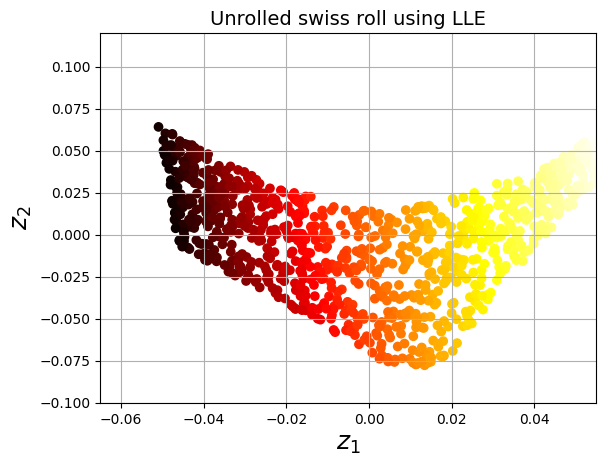

In [21]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)


plt.show()

#### 其他降维方法
1. 随机投影
    - 使用随机线性投影将数据投影到较低维度的空间。这听起来可能很疯狂，但事实证明，这样的随机投影实际上很有可能很好地保持距离，就如William B.Johnson和Joram Lindenstrauss在著名引理中的数学证明。降维的质量取决于实例数目和目标维度，令人惊讶的不取决于初始维度。
    - klearn.random_projection
2. 多维缩放（MDS）
    - 当尝试保留实例之间的距离时降低维度。Isomap通过将每个实例与其最近的邻居连接来创建一个图，然后在尝试保留实例之间的测地距离[1]的同时降低维度。
3. t分布随机近邻嵌入（t-SNE）
    - 降低了维度，同时使相似实例保持接近，异类实例分开。它主要用于可视化，特别是在高维空间中可视化实例的聚类（例如，以2D可视化MNIST图像）​。
4. 线性判别分析（LDA）
    - LDA是一种分类算法，但是在训练过程中，它会学习各类之间最有判别力的轴，然后可以使用这些轴来定义要在其上投影数据的超平面。这种方法的好处是投影将使类保持尽可能远的距离，因此LDA是在运行其他分类算法（例如SVM分类器）之前降低维度的好技术。

#### 练习题
1. 减少数据集维度的主要动机是什么？主要缺点是什么？
    - 降低维度，减少计算量，使得训练速度更快
    - 容易过你和
    - **在某些情况下，也可能为了消除噪声和冗余特征，使训练算法性能更好**
    - **为了将数据可视化，并从中获得洞见，了解最重要的特征。**
    - **为机器学习流水线增添了些许复杂度**
    - **转换后的特征往往难以解释**
2. 维度的诅咒是什么？
    - 在高维数据是很稀散的，很容易过拟合
    
3. 一旦降低了数据集的维度，是否可以逆操作？如果可以，怎么做？如果不能，为什么？
    - 可以逆操作，重构，但是无法完全复原，会有一定的误差
4. 可以使用PCA来减少高度非线性的数据集的维度吗？
    - 可以
    - 对大多数数据集来说，PCA可以用来进行显著降维，**即便是高度非线性的数据集，因为它至少可以消除无用的维度。**
5. 假设你在1000维的数据集上执行PCA，将可解释方差比设置为95%。结果数据集将具有多少个维度
    - 它取决于数据集，它可能是1到950之间的任何数字
6. 在什么情况下，你将使用常规PCA、增量PCA、随机PCA或内核PCA？
    - **常规PCA是默认选择**
    - 数据不完全在内存之中选择增量PCA
    - 数据量较大且数据特征不明显可以使用随机PCA
    - 当数据特征复杂，且**不是线性数据**时，选择内核PCA
7. 如何评估数据集中的降维算法的性能？
    - 通过可解释方差比
    - 通过重构误差
8. 链接两个不同的降维算法是否有意义？
    - 链接两个不同的降维算法绝对是有意义的。常见的示例是使用PCA快速去除大量无用的维度，然后应用另一种更慢的降维算法，如LLE。这种两步走的策略产生的结果可能与仅使用LLE相同，但是时间要短得多
    



In [1]:
# 9. 加载MNIST数据集（在第3章中介绍）​，并将其分为训练集和测试集（使用前60 000个实例进行训练，其余10 000个进行测试）​。在数据集上训练随机森林分类器，花费多长时间，然后在测试集上评估模型。接下来，使用PCA来减少数据集的维度，可解释方差率为95%。在精简后的数据集上训练新的随机森林分类器，查看花费了多长时间。训练速度提高了吗？接下来，评估测试集上的分类器。与之前的分类器相比如何？

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,parser="auto",as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
from sklearn.model_selection import train_test_split
X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=6/7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [3]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [4]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9687

使用PCA降维

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(60000, 154)
(10000, 154)


In [9]:
rnd_clf = RandomForestClassifier(bootstrap=True, oob_score=True,random_state=42)
rnd_clf.fit(X_train_reduced, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [13]:
y_pred = rnd_clf.predict(X_test_reduced)
accuracy_score(y_pred, y_test)

0.951

In [2]:
# 10. 使用t-SNE将MNIST数据集降至两个维度，然后用Matplotlib绘制结果。你可以通过散点图用10个不同的颜色来代表每个图像的目标类，或者也可以用对应实例的类（从0到9的数字）替换散点图中的每个点，甚至你还可以绘制数字图像本身的缩小版（如果你绘制所有数字，视觉效果会太凌乱，所以你要么绘制一个随机样本，要么选择单个实例，但是这个实例的周围最好没有其他绘制的实例）​。现在你应该得到了一个很好的可视化结果及各自分开的数字集群。尝试使用其他降维算法，如PCA、LLE或MDS等，比较可视化结果。

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

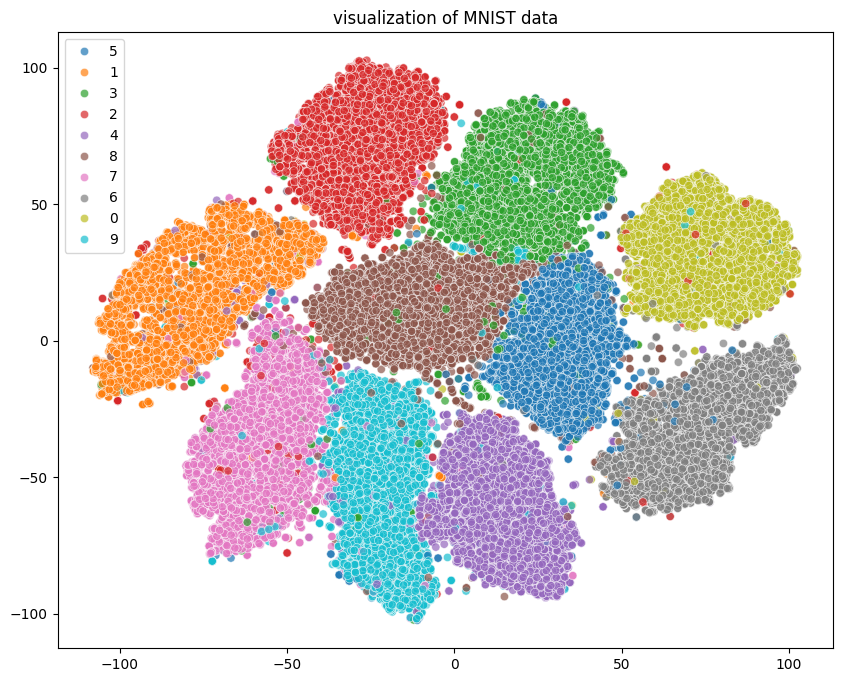

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_digits_decomposition(X,y):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="tab10", legend="full", alpha=0.7)
    plt.title('visualization of MNIST data')
    plt.show()
plot_digits_decomposition(X_tsne,y_train)

In [21]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train)

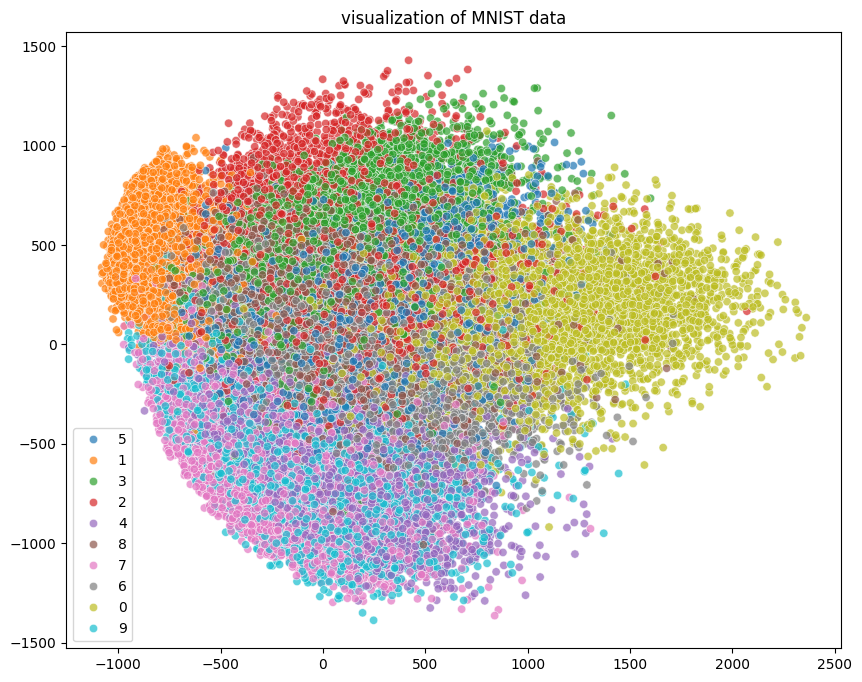

In [25]:
plot_digits_decomposition(X_pca,y_train)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X)

In [ ]:
plot_digits_decomposition(X_lle, y_train)